# Project: Investigation of No Show Appointments  Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, data containing information about medical appointments in Brazil will be explored. The dataset includes 110,527 medical appointments and their associated attributes. The most important attribute and our focus is the No Show Status which indicates if a patient showed up for the scheduled appointment or not.

### Questions
<ol>
<li>Does the time differences between the days the appointments were made and the appointment dates correlate with the number of appointments that were missed?</li>
<li>Which age group has the highest attendance rate?
</ol>


In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic woird to make plotted visualizations inline with the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print a few lines
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The spellings of the columns 'Handcap' and 'Hipertension' have to be changed to their correct forms. The names of other columns  have to be changed to their snake case forms too.

In [3]:
#print the summary of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Only the columns with numeric values are summarized. From the summary, it is observed that the Age column contains values less than 0 which does not make sense. The rows with Age values less than 0 have to be dropped.

In [4]:
#Print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataframe has 14 columns and 110527 rows. 8 of the columns are of int64 datatype, 5 are of object datatype and 1 is of float datatype. The datatypes of AppointmentDay and ScheduledDay need to be changed to the datetime datatype. 

The dataframe does not contain any null value.

 

In [5]:
#find the number of unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Since the number of unique values for PatientID is less than that of AppointmentId, it is concluded that some patients made multiple medical appointments.

According to the description of the dataset, the Handcap column is supposed to contain only 2 unique values (0 and 1). We need to determine the other values in the column and decide what to do with them.

In [6]:
#find the unique values in the Handcap column
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

 The other values in the Handcap column are 2, 3, and 4. They will be changed to 1 which is the True instance of the column.

In [7]:
#Find the number of duplicates in the dataframe
df.duplicated().sum()

0

The number of duplicates is 0 but it is assumed there might be duplicates after dropping the AppointmentId which has a unique value for every appointment. This means there might have been multiple entries for the same appointment.

### Data Cleaning

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [9]:
#Drop the AppointmentID column
df.drop(['AppointmentID'] , axis=1, inplace=True)
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The AppointmentID column was dropped since it does not have any significance to the appointments.

In [10]:
#Rename and change the column names to snakecase
import re
def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df.rename(columns = lambda x: camel_to_snake(x), inplace=True)
df.rename(columns = {'hipertension':'hypertension', 'handcap':'handicap', 'no-show':'no_show'}, inplace=True)
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Following standard practice and for the use use of the pandas.query function, all the column names were changed to their snakecase forms. Spelling errors in the names were corrected too.

In [11]:
#Change the datatypes of appointment_day and scheduled_day to datetime
df[['appointment_day', 'scheduled_day']] = df[['appointment_day', 'scheduled_day']].apply(pd.to_datetime)
df.dtypes

patient_id                     float64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

In [12]:
#Remove any row that has age < 0
df.drop(df.query("age < 0").index, inplace=True)

In [13]:
#Change all the handicap values greater than one to one
df.loc[df['handicap'] > 1, 'handicap'] = 1

In [14]:
#Create a new column named waiting_time that contains the number of days between appointment day and scheduled day
from datetime import timedelta

df['waiting_time'] = ((df['appointment_day'] + timedelta(days=1)) - df['scheduled_day']).dt.days

The specific time of the appointments isn't specified which will distort the result of the waiting time for appointments that were scheduled for the same day as the scheduled day. A day was added to the appointment_day column to give a correct representation.

In [15]:
#Find the appointments that were scheduled before the scheduled day 
early_df = df.loc[df['scheduled_day'] > (df['appointment_day'] + timedelta(days=1))]
early_df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
27033,7.839273e+12,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [16]:
#Drop early_df
df.drop(early_df.index, inplace=True)

Appointments that were scheduled before the scheduled dates were dropped. 

In [17]:
#Create  a new column that contains the day of the week of the appointment date
df['appointment_day_of_week'] = df['appointment_day'].dt.day_name()
df['appointment_day_of_week'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: appointment_day_of_week, dtype: int64

In [18]:
#Print the no of duplicates in the new dataframe
print(df.duplicated().sum())
#Drop the duplicates
df.drop_duplicates(inplace = True)

618


The dataframe was checked again for the presence of duplicates since it was assumed that there might be repetition in the scheduling of appointments for the same patient. 

In [19]:
# Create a copy of df
abridged_df = df.copy()
#Sort abridged_df by the values of some columns
abridged_df.sort_values(by=['patient_id', 'scheduled_day', 'appointment_day', 'no_show'], inplace=True)
abridged_df.drop(['appointment_day_of_week', 'appointment_day', 'waiting_time', 'sms_received'] , axis=1, inplace=True)
abridged_df.head()

,patient_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show
100517,39217.84439,F,2016-05-31 10:56:41+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,No
105430,43741.75652,M,2016-06-01 14:22:58+00:00,39,MARIA ORTIZ,0,0,1,0,0,No
3950,93779.52927,F,2016-05-18 09:12:29+00:00,33,CENTRO,0,0,0,0,0,No
73303,141724.16655,M,2016-04-29 07:13:36+00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,No
73228,537615.28476,F,2016-04-29 07:19:57+00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,No


Appointments for the same patient that were not scheduled more than once will have unique scheduled dates. Hence, the dataframe was checked for such occurrences.

In [20]:
#Find the number of duplicates in the abridged dataframe
print(abridged_df.duplicated().sum())
#Drop the duplicates
abridged_df.drop_duplicates(keep='last', inplace=True)

687


In [21]:
#Find the shape of the abridged dataframe
abridged_df.shape

(109216, 11)

In [22]:
#Create the final dataframe containing non duplicate entries of appointments
final_df = df.loc[abridged_df.index]
final_df.shape

(109216, 15)

In [23]:
#Create a dataframe containing the appointments that were successful
yes_df = final_df.loc[final_df['no_show'] == 'No']
#Create a dataframe containing the appointments that weren't successful
no_df = final_df.loc[final_df['no_show'] == 'Yes']
print(yes_df.shape, no_df.shape)

(87343, 15) (21873, 15)


In [24]:
#find the number of unique values for each column in the final dataframe
df.nunique()

patient_id                  62298
gender                          2
scheduled_day              103543
appointment_day                27
age                           103
neighbourhood                  81
scholarship                     2
hypertension                    2
diabetes                        2
alcoholism                      2
handicap                        2
sms_received                    2
no_show                         2
waiting_time                  129
appointment_day_of_week         6
dtype: int64

In [25]:
#cut the age column into bins
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 115]
# Labels for the ten age groups
bin_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-115']
final_df['age'] = pd.cut(final_df['age'], bin_edges, labels=bin_names)

In [26]:
#cut the waiting_time column into bins
final_df['waiting_time'] = pd.cut(final_df['waiting_time'], bins=[0, 1, 7, 15, 31, 179], labels=['0-1 day', '2 - 7 days', '8-15 days', '16-31 days', '31+ days'], include_lowest=True)

The age and waiting_time columns were binned into groups for easy visualizations and to be able to answer one of the questions posed above.

In [27]:
#Create a pandas series to store the count for each unique waiting_time group
age_val_count = final_df['age'].value_counts()

In [28]:
#Create a pandas series to store the count for each unique age group
waiting_time_val_count = final_df['waiting_time'].value_counts()

<a id='eda'></a>
## Exploratory Data Analysis

### Does the time differences between the days the appointments were made and the appointment dates correlate with the number of appointments that were missed?

In [29]:
heights = final_df.no_show.value_counts()

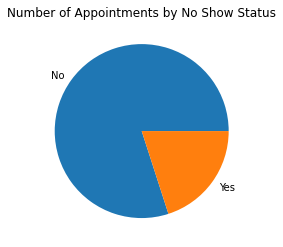

In [30]:
#create a pie chart for the no_show column
plt.pie(heights, labels=heights.index);
plt.title('Number of Appointments by No Show Status')
plt.show()

Most patients showed up for their appointments

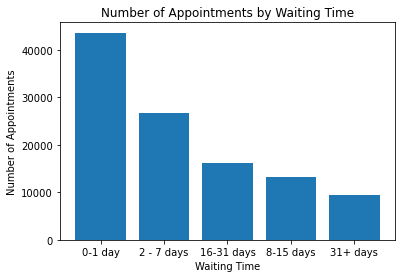

In [31]:
# Create a bar chart to show the number of appointments by waiting time
locations = [1, 2, 3, 4, 5]
heights = waiting_time_val_count
labels = waiting_time_val_count.index
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Appointments by Waiting Time')
plt.xlabel('Waiting Time')
plt.ylabel('Number of Appointments')
plt.show()

Most appointments were scheduled for the same day as the scheduled day and fewer appointments were scheduled to farther dates.

In [32]:
#Find the count of each value in the no_show column for each waiting_time group
waiting_time_cross_tab = pd.crosstab(index=final_df['waiting_time'], columns=final_df['no_show'])
waiting_time_cross_tab

no_show,No,Yes
waiting_time,,
0-1 day,40774,2882
2 - 7 days,20116,6580
8-15 days,9182,4082
16-31 days,10944,5240
31+ days,6327,3089


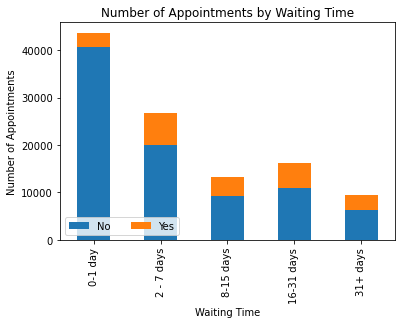

In [33]:
# Create a stacked bar chart to show the number of appointments by waiting time
waiting_time_cross_tab.plot(kind='bar', stacked=True)
plt.legend(loc="lower left", ncol=2)
plt.title('Number of Appointments by Waiting Time')
plt.xlabel('Waiting Time')
plt.ylabel('Number of Appointments')
plt.show()

In [34]:
#Find the proportion of each value in the no_show column to the total number of rows for each each waiting_time group
waiting_time_prop = pd.crosstab(index=final_df['waiting_time'], columns=final_df['no_show'], normalize="index")
waiting_time_prop

no_show,No,Yes
waiting_time,,
0-1 day,0.933984,0.066016
2 - 7 days,0.753521,0.246479
8-15 days,0.692250,0.307750
16-31 days,0.676223,0.323777
31+ days,0.671941,0.328059


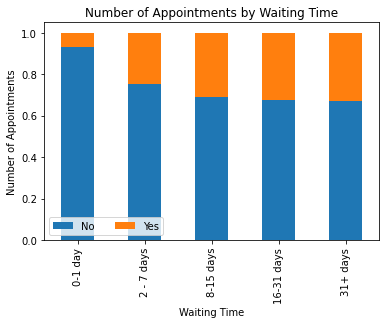

In [35]:
# Create a stacked bar chart to show the proportions of the no_show column values for each waiting_time group
waiting_time_prop.plot(kind='bar', stacked=True)
plt.legend(loc="lower left", ncol=2)
plt.title('Number of Appointments by Waiting Time')
plt.xlabel('Waiting Time')
plt.ylabel('Number of Appointments')
plt.show()

Two stacked bar charts were computed using both the actual number of values and the proportion of the values but the latter gives a better visualization. It is noticed that for short waiting times, more patients showed up on the scheduled dates, while fewer patients missed their appointments for longer waiting times. This proves that the waiting time correlates with the number of appointments patients miss. 

### Which age group has the highest attendance rate?

In [36]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


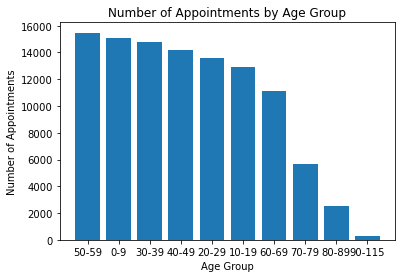

In [37]:
# Create a bar chart 
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
heights = age_val_count
labels = age_val_count.index
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Appointments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
plt.show()

Patients within the age group of 50 - 59 are more than the patients in the other groups.

In [38]:
#Find the proportion of each value in the no_show column to the total number of rows for each each age group
age_cross_tab_prop = pd.crosstab(index=final_df['age'], columns=final_df['no_show'], normalize="index")
age_cross_tab_prop

no_show,No,Yes
age,,
0-9,0.794379,0.205621
10-19,0.748783,0.251217
20-29,0.755279,0.244721
30-39,0.787999,0.212001
40-49,0.802378,0.197622
50-59,0.828186,0.171814
60-69,0.853228,0.146772
70-79,0.846262,0.153738
80-89,0.842251,0.157749


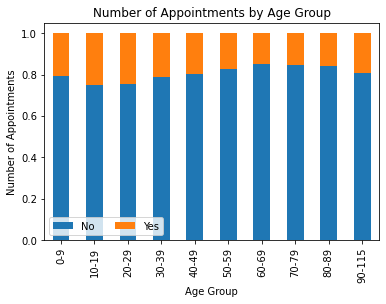

In [39]:
# Create a stackedbar chart to show the proportions of the no_show column values for each age group
age_cross_tab_prop.plot(kind='bar', stacked=True)
plt.legend(loc="lower left", ncol=2)
plt.title('Number of Appointments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
plt.show()

Patients aged 60-69 have the highest attendance rate.

<a id='conclusions'></a>
## Conclusions

>**Results:** It was discovered that
    <ol>
        <li>Few patients missed their appointments given less waiting time, which is the difference between the appointment date and the scheduled date.</li> 
        <li>The age group, 60-69 has the highest attendance rate. This does not mean any patient in the group will certainly show up for the scheduled appointment. Also, the difference between its attendance rate and that of other age groups is not significant.</li>
    </ol>

>**Limitations:** The following limited the exploration of the dataset:
    <ol>
        <li>The reason for making an appointment was not indicated in the dataset and this might be a huge factor in determining why some patients didn't show up for appointments. This stems from the fact that patients with serious or life-threatening illnesses would likely not miss their appointments.</li>
        <li>Most of the variables are categorical thereby limiting the statistical analysis that can be done to establish a correlation between them.</li>
    </ol>